In [26]:
import matplotlib.pyplot as plt 
import numpy as np
import os, sys
top_dir = os.getcwd().split('ipython_nb')[0]
sys.path.append(top_dir+ 'v4cnn/')
sys.path.append( top_dir + 'xarray');top_dir = top_dir + 'v4cnn/';
sys.path.append( top_dir + 'common/')
sys.path.append(top_dir +'/nets')
import pickle as pk
import xarray as xr
import pandas as pd
import apc_model_fit as ac
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import d_plot as dp
import scipy.io as  l
import scipy as sc
import d_img_process as imp
import d_net_analysis as dn
import caffe_net_response as cf
%matplotlib inline  
goforit=False
if 'a' not in locals() or goforit:
    with open(top_dir + 'nets/netwts.p', 'rb') as f:    
        try:
            a = pk.load(f, encoding='latin1')
        except:
            a = pk.load(f)

def open_cnn_analysis(fn,layer_label):
    try:
        an=pk.load(open(top_dir + 'data/an_results/' + fn,'rb'), 
                   encoding='latin1')
    except:
        an=pk.load(open(top_dir + 'data/an_results/' + fn,'rb'))
    fvx = an[0].sel(concat_dim='r2')
    rf = an[0].sel(concat_dim='rf')
    cnn = an[1]
    return fvx, rf, cnn
cnn_names =['bvlc_reference_caffenetAPC362_pix_width[32.0]_pos_(64.0, 164.0, 51)',]
da = xr.open_dataset(top_dir + 'data/responses/' + cnn_names[0] + '.nc')['resp']
da = da.sel(unit=slice(0, None, 1)).squeeze()
middle = np.round(len(da.coords['x'])/2.).astype(int)
da_0 = da.sel(x=da.coords['x'][middle])
indexes = np.unique(da.coords['layer_label'].values, return_index=True)[1]
layer_label = [da.coords['layer_label'].values[index] for index in sorted(indexes)]

fns = [
'bvlc_reference_caffenetAPC362_pix_width[32.0]_pos_(64.0, 164.0, 51)_analysis.p',
'blvc_caffenet_iter_1APC362_pix_width[32.0]_pos_(64.0, 164.0, 51)_analysis.p',
'bvlc_caffenet_reference_shuffle_layer_APC362_pix_width[32.0]_pos_(64.0, 164.0, 51)_analysis.p',
'bvlc_reference_caffenetAPC362_pix_width[32.0]_pos_(64.0, 164.0, 51)_null_analysis.p'
]
alt = pd.concat([open_cnn_analysis(fns[0], layer_label)[-1]], axis=0)
init = open_cnn_analysis(fns[1], layer_label)[-1]
shuf = open_cnn_analysis(fns[2], layer_label)[-1]
cnn_an = pd.concat([alt, init, shuf ], 
          axis=0, keys=['resp',  'init. net', 's. layer wts'], names=['cond','layer_label','unit'])

ti_cnn = cnn_an[~cnn_an['ti_av_cov'].isnull()]
ti_cnn = ti_cnn[(ti_cnn['k']>2)&(ti_cnn['k']<40)]['ti_av_cov']

rf = open_cnn_analysis(fns[0], layer_label)[1]
cor = open_cnn_analysis(fns[0], layer_label)[0]
av_cors = cor.groupby('layer_label').mean('unit')
av_rfs = rf.groupby('layer_label').mean('unit')

In [41]:
rfk = sc.stats.kurtosis(rf,1)[ti_cnn.index.get_level_values('unit')]
rf.shape

(22096, 51)

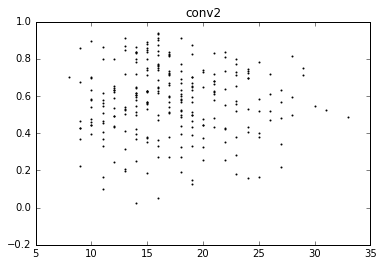

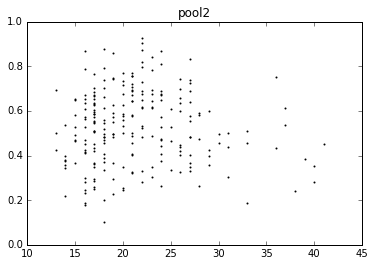

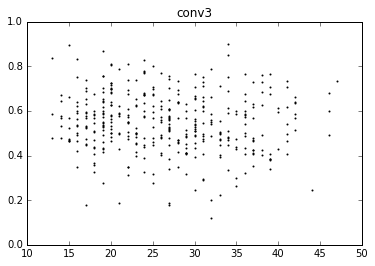

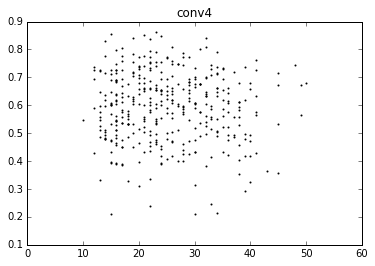

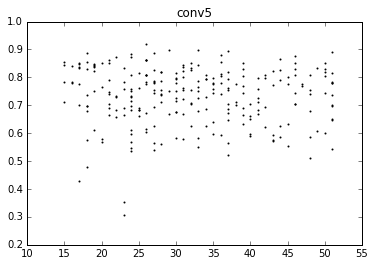

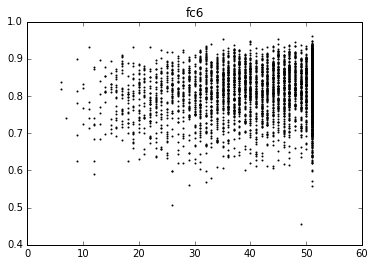

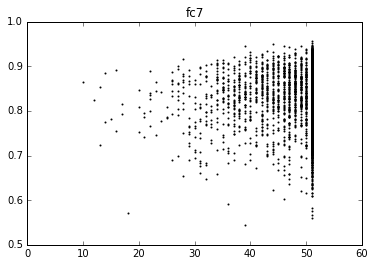

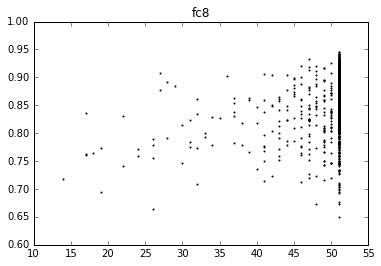

In [54]:
layers_to_examine = ['conv2', 'pool2', 'conv3', 'conv4','conv5', 'fc6','fc7','fc8']

for layer in layers_to_examine:
    plt.figure()
    #rfk = sc.stats.kurtosis(rf,1)[ti_cnn[layer].index.get_level_values('unit')]
    rf_layer = rf[ti_cnn[layer].index.get_level_values('unit'),:]
    mx = np.max(rf_layer,1)
    rf_mg = np.sum(rf_layer>mx/2, 1)
    plt.scatter(rf_mg, ti_cnn[layer],s=1)
    plt.title(layer)
